```
B x C x D
^   ^   ^
|   |   |________ Embedding dimension
|   |  
|   |___ Context Dimension
|    
Batch dimension 
```

In [19]:
import torch

torch.manual_seed(123)

# Your journey starts with one step
context = torch.tensor(
  [
    [0.43, 0.15, 0.86], # Your
    [0.55, 0.87, 0.66], # journey
    [0.57, 0.85, 0.64], # starts 
    [0.22, 0.58, 0.33], # with
    [0.77, 0.25, 0.10], # one
    [0.05, 0.80, 0.55] # step
  ]
)

In [20]:
context

tensor([[0.4300, 0.1500, 0.8600],
        [0.5500, 0.8700, 0.6600],
        [0.5700, 0.8500, 0.6400],
        [0.2200, 0.5800, 0.3300],
        [0.7700, 0.2500, 0.1000],
        [0.0500, 0.8000, 0.5500]])

## Selecting an Item for Query

Given our `context`, we would like to compute for the second token, the context vector for the token corresponding to the word "journey".

context vector is the "attention"

In [21]:
q_2 = context[1]
q_2

tensor([0.5500, 0.8700, 0.6600])

Compute the attention score

In [24]:
attention_scores = torch.empty(len(context))
for i, t_i in enumerate(context):
  attention_scores[i] = torch.dot(q_2, t_i)

attention_scores, attention_scores.shape

(tensor([0.9346, 1.4950, 1.4754, 0.8434, 0.7070, 1.0865]), torch.Size([6]))

Normalize the attention scores, and create the attention weights -- all elements in the attention weights vector should sum up to 1.0


In [25]:
attention_weights = torch.softmax(attention_scores, dim=-1)
attention_weights

tensor([0.1362, 0.2385, 0.2339, 0.1243, 0.1085, 0.1585])

Sum the values inside the tensor

In [26]:
attention_weights.sum()

tensor(1.0000)

Compute the context vector

In [27]:
context_vector = torch.zeros(len(q_2))
for i, c_i in enumerate(context):
  context_vector += attention_weights[i] * c_i

context_vector

tensor([0.4419, 0.6528, 0.5633])

## Generalize Context Computation For All Tokens in Input

In [28]:
attention_scores = context @ context.T
attention_scores

tensor([[0.9470, 0.9346, 0.9230, 0.4654, 0.4546, 0.6145],
        [0.9346, 1.4950, 1.4754, 0.8434, 0.7070, 1.0865],
        [0.9230, 1.4754, 1.4570, 0.8296, 0.7154, 1.0605],
        [0.4654, 0.8434, 0.8296, 0.4937, 0.3474, 0.6565],
        [0.4546, 0.7070, 0.7154, 0.3474, 0.6654, 0.2935],
        [0.6145, 1.0865, 1.0605, 0.6565, 0.2935, 0.9450]])

In [29]:
attention_weights = torch.softmax(attention_scores, dim=-1)
attention_weights

tensor([[0.2037, 0.2012, 0.1988, 0.1258, 0.1245, 0.1461],
        [0.1362, 0.2385, 0.2339, 0.1243, 0.1085, 0.1585],
        [0.1367, 0.2375, 0.2332, 0.1245, 0.1111, 0.1569],
        [0.1423, 0.2077, 0.2048, 0.1464, 0.1265, 0.1723],
        [0.1522, 0.1959, 0.1976, 0.1367, 0.1879, 0.1296],
        [0.1365, 0.2189, 0.2132, 0.1424, 0.0990, 0.1900]])

In [30]:
context_vectors = attention_weights @ context
context_vectors

tensor([[0.4424, 0.5955, 0.5695],
        [0.4419, 0.6528, 0.5633],
        [0.4432, 0.6509, 0.5621],
        [0.4304, 0.6305, 0.5463],
        [0.4671, 0.5912, 0.5219],
        [0.4177, 0.6515, 0.5597]])

## Simple Attention Mechanism in TTNN

Setup the environment

In [31]:
import os
os.environ["TTNN_CONFIG_OVERRIDES"] = "{\"enable_fast_runtime_mode\": false}"

In [32]:
os.environ.get("TTNN_CONFIG_OVERRIDES")

'{"enable_fast_runtime_mode": false}'

Import everything needed and define the sample input context again

In [33]:
import torch
import ttnn
from ttnn.tracer import trace, visualize

torch.manual_seed(123)

# Your journey starts with one step
context = torch.tensor(
  [
    [0.43, 0.15, 0.86], # Your
    [0.55, 0.87, 0.66], # journey
    [0.57, 0.85, 0.64], # starts 
    [0.22, 0.58, 0.33], # with
    [0.77, 0.25, 0.10], # one
    [0.05, 0.80, 0.55] # step
  ]
)



In [35]:
context, context.shape

(tensor([[0.4300, 0.1500, 0.8600],
         [0.5500, 0.8700, 0.6600],
         [0.5700, 0.8500, 0.6400],
         [0.2200, 0.5800, 0.3300],
         [0.7700, 0.2500, 0.1000],
         [0.0500, 0.8000, 0.5500]]),
 torch.Size([6, 3]))

2025-05-14 16:29:13.237 | DEBUG    | ttnn.tracer:visualize:443 - Dumping graph of the model to None
2025-05-14 16:29:13.241 | DEBUG    | ttnn.tracer:visualize:443 - Dumping graph of the model to None


                 Always | INFO     | Begin op: tt::tt_metal::detail::convert_python_tensor_to_tt_tensor
                 Always | INFO     | input any type name ignored: std::__1::reference_wrapper<pybind11::handle const>
                 Always | INFO     | input any type name ignored: std::__1::reference_wrapper<std::__1::optional<tt::tt_metal::DataType>>
                 Always | INFO     | input any type name ignored: std::__1::reference_wrapper<std::__1::optional<tt::tt_metal::Layout>>
                 Always | INFO     | input any type name ignored: std::__1::reference_wrapper<std::__1::optional<tt::tt_metal::Tile> const>
                 Always | INFO     | input any type name ignored: std::__1::reference_wrapper<tt::tt_metal::MemoryConfig const>
                 Always | INFO     | input any type name ignored: std::__1::reference_wrapper<tt::tt_metal::IDevice*>
                 Always | INFO     | input any type name ignored: std::__1::reference_wrapper<bool const>
            

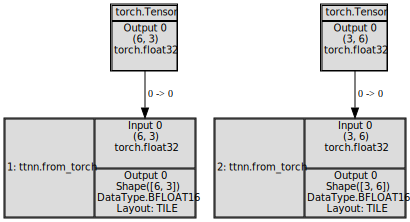

In [36]:
with trace():
  context_ttnn = ttnn.from_torch(context, dtype=ttnn.bfloat16, layout=ttnn.TILE_LAYOUT)
  context_transposed_ttnn = ttnn.from_torch(context.T, dtype=ttnn.bfloat16, layout=ttnn.TILE_LAYOUT)

visualize(context_ttnn)
visualize(context_transposed_ttnn)

1. Transfer the context and transposed version of the context ttnn tensors to the device
2. Compute the attention scores using `ttnn.matmul`. Assume both the context and context transposed ttnn tensors are already in the device and in `TILE_LAYOUT`.
3. Perform softmax on the resulting attention scores tensor (was result in step 2)
4. Compute the context vectors using `ttnn.matmul` against attention weights and context. Attention weights are normalized attention scores. (this is result from step 3)
5. Transfer the results of step 4, the context vectors back to CPU as torch tensors

In [37]:
device_id = 0
device = ttnn.open_device(device_id=device_id)

with trace():
  context_ttnn = ttnn.to_device(context_ttnn, device)
  context_transposed_ttnn = ttnn.to_device(context_transposed_ttnn, device)

  attention_scores_ttnn = ttnn.matmul(context_ttnn, context_transposed_ttnn)
  attention_weights_ttnn = ttnn.softmax(attention_scores_ttnn, dim=-1)

  context_vectors_ttnn = ttnn.matmul(attention_weights_ttnn, context_ttnn)

  context_vectors_torch = ttnn.to_torch(context_vectors_ttnn, device=device)

ttnn.close_device(device)

context_vectors_torch

                 Device | INFO     | Opening user mode device driver
2025-05-14 16:38:21.319 | INFO     | SiliconDriver   - Opened PCI device 0; KMD version: 1.33.0, IOMMU: disabled

2025-05-14 16:38:21.333 | INFO     | SiliconDriver   - Opened PCI device 0; KMD version: 1.33.0, IOMMU: disabled
2025-05-14 16:38:21.336 | INFO     | SiliconDriver   - Harvesting mask for chip 0 is 0x200 (physical layout: 0x1, logical: 0x200, simulated harvesting mask: 0x0).
2025-05-14 16:38:21.337 | INFO     | SiliconDriver   - Opened PCI device 0; KMD version: 1.33.0, IOMMU: disabled
2025-05-14 16:38:21.337 | INFO     | SiliconDriver   - Detected PCI devices: [0]
2025-05-14 16:38:21.337 | INFO     | SiliconDriver   - Using local chip ids: {0} and remote chip ids {}
2025-05-14 16:38:21.347 | INFO     | SiliconDriver   - Software version 6.0.0, Ethernet FW version 6.14.0 (Device 0)
                  Metal | INFO     | Initializing device 0. Program cache is NOT enabled
                  Metal | INFO     | 

New chip! We now have 1 chips
Chip initialization complete (found )
Chip initializing complete...
 ARC

 [4/4] DRAM

 [16/16] ETH

 CPU

Chip detection complete (found )


TracedTorchTensor([[0.4414, 0.5898, 0.5664],
                   [0.4355, 0.6523, 0.5625],
                   [0.4375, 0.6484, 0.5625],
                   [0.4297, 0.6250, 0.5430],
                   [0.4609, 0.5859, 0.5195],
                   [0.4180, 0.6523, 0.5586]], dtype=torch.bfloat16)

Torch version:

```
tensor([[0.4424, 0.5955, 0.5695],
        [0.4419, 0.6528, 0.5633],
        [0.4432, 0.6509, 0.5621],
        [0.4304, 0.6305, 0.5463],
        [0.4671, 0.5912, 0.5219],
        [0.4177, 0.6515, 0.5597]])
```

ttnn version:
```
TracedTorchTensor([[0.4414, 0.5898, 0.5664],
                   [0.4355, 0.6523, 0.5625],
                   [0.4375, 0.6484, 0.5625],
                   [0.4297, 0.6250, 0.5430],
                   [0.4609, 0.5859, 0.5195],
                   [0.4180, 0.6523, 0.5586]], dtype=torch.bfloat16)
```

2025-05-14 16:40:07.309 | DEBUG    | ttnn.tracer:visualize:443 - Dumping graph of the model to None


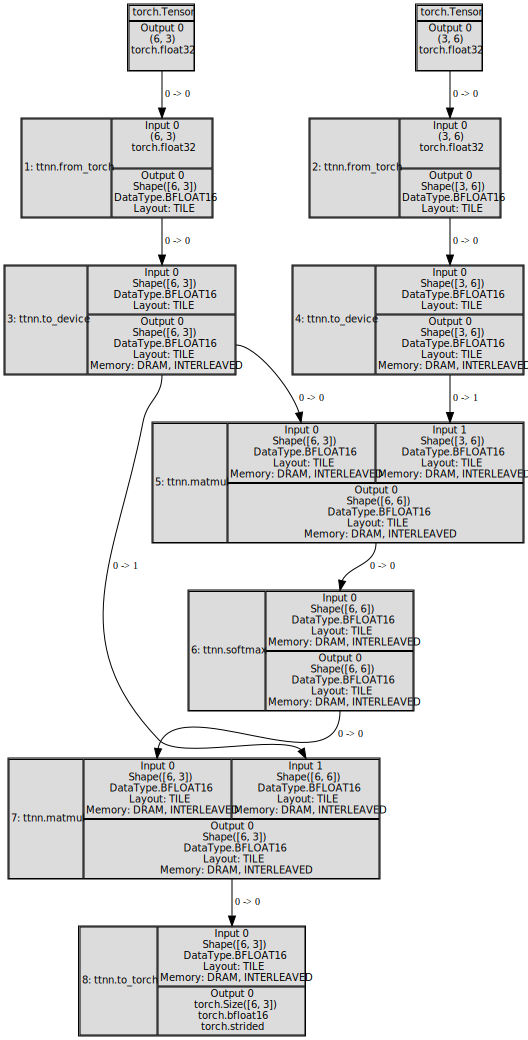

In [38]:
visualize(context_vectors_torch)